# Data Visualization Techniques - Continued

## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib as mpl
mpl.rcParams['font.size'] = 6


In [60]:
# read the data
df = pd.read_csv('dataset_covid/Covid19_LEACases_Mapped_Historic_Records.csv')
df.head()

#extract months and years from date
df['month'] = pd.DatetimeIndex(df['EventDate']).month
df['year'] = pd.DatetimeIndex(df['EventDate']).year

# extract columns to be plotted
df = df[(df.year == 2021 )]
df = df[(df.month == 4 )]


df['date'] = pd.DatetimeIndex(df['EventDate']).date
date = df['date'].unique()

In [61]:
#extract the incidence rates in the first week of April
df1 = df[(df.date)== pd.Timestamp(2021, 4, 5)]

## Single Line Plot

No handles with labels found to put in legend.


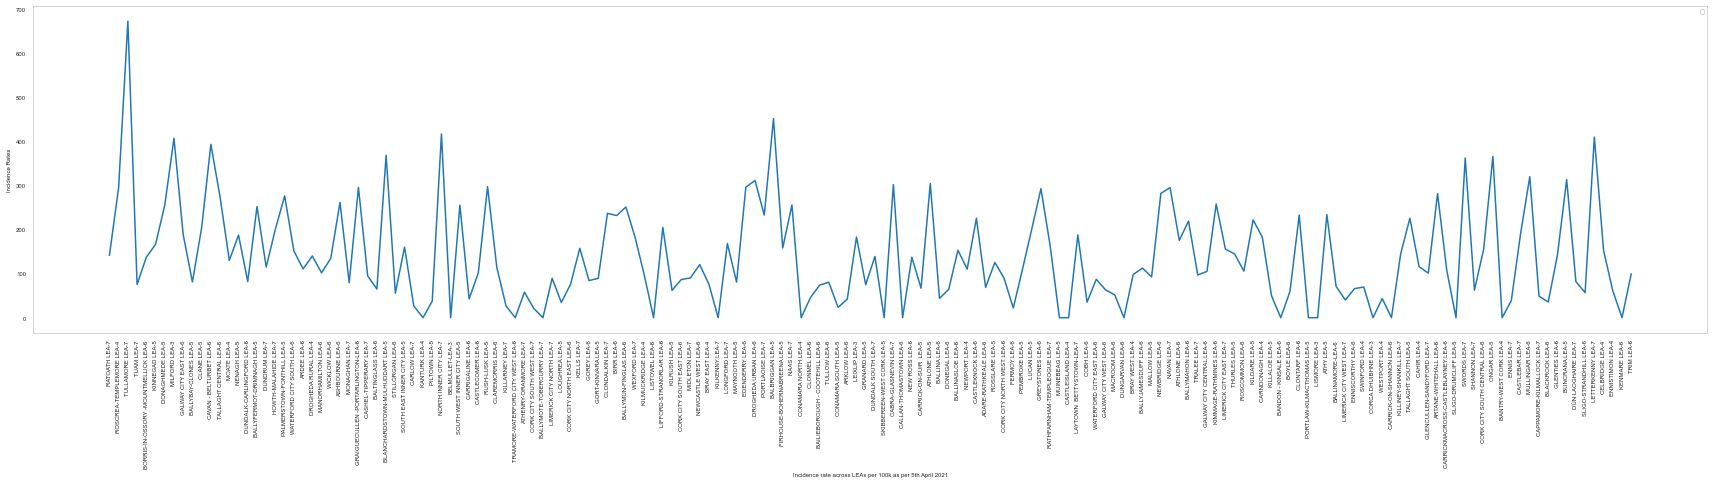

In [62]:
plt.figure(figsize=(30,6))
plt.plot(df1.ENGLISH, df1.P14_100k)
plt.xticks(df1.ENGLISH, rotation=90)
plt.xlabel('Incidence rate across LEAs per 100k as per 5th April 2021')
plt.ylabel('Incidence Rates')
plt.legend()
plt.grid(False)

## Multiple Line Plots

In [63]:
#extract dates for the next weeks in April
df2 = df[(df.date)== pd.Timestamp(2021, 4, 12)]
df3 = df[(df.date)== pd.Timestamp(2021, 4, 19)]

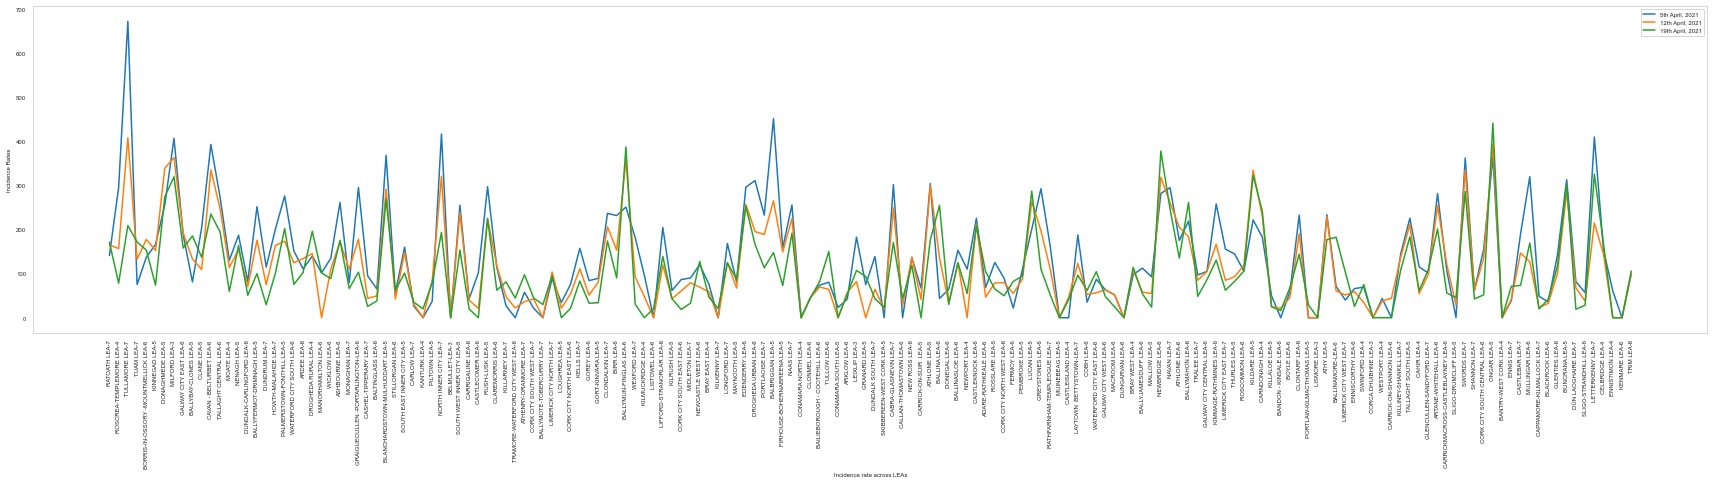

In [64]:
plt.figure(figsize=(30,6))
plt.plot(df1.ENGLISH, df1.P14_100k, label ='5th April, 2021')
plt.plot(df2.ENGLISH, df2.P14_100k, label = '12th April, 2021')
plt.plot(df3.ENGLISH, df3.P14_100k, label = '19th April, 2021')
plt.xticks(df1.ENGLISH, rotation=90)
plt.xlabel('Incidence rate across LEAs')
plt.ylabel('Incidence Rates')
plt.legend()
plt.grid(False)

## Plotting line graph with area under curve

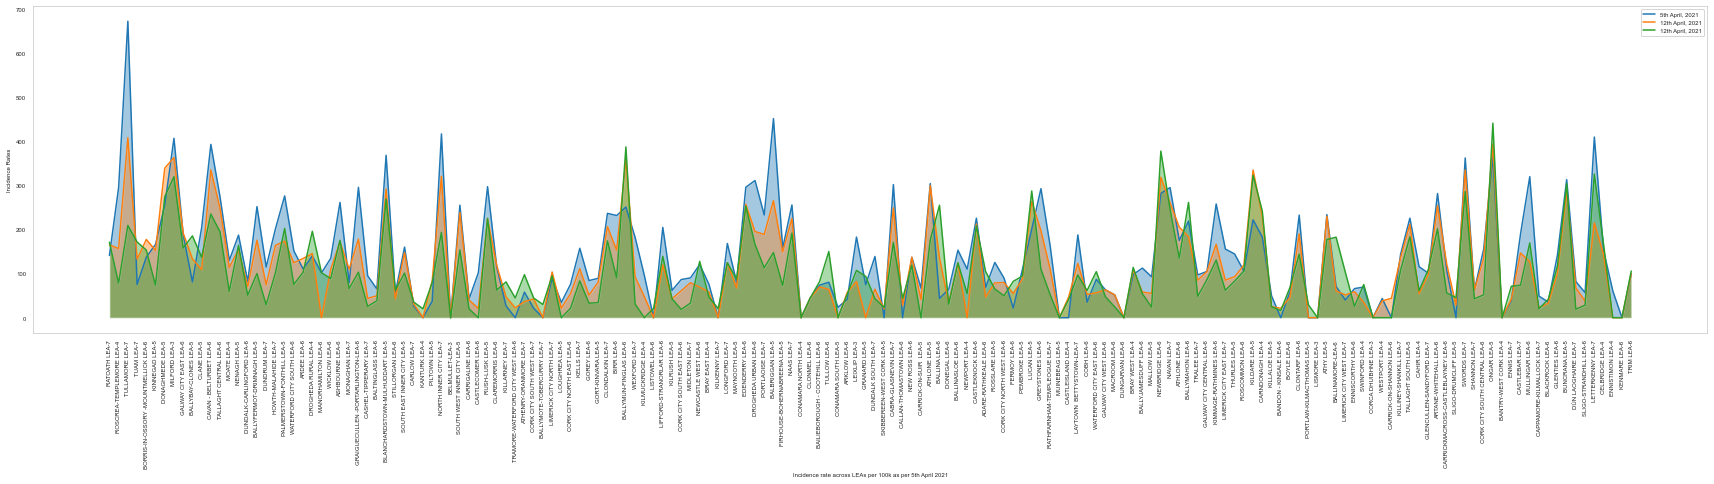

In [65]:
plt.figure(figsize=(30,6))
plt.plot(df1.ENGLISH, df1.P14_100k, label ='5th April, 2021')
plt.plot(df2.ENGLISH, df2.P14_100k, label = '12th April, 2021')
plt.plot(df3.ENGLISH, df3.P14_100k, label = '12th April, 2021')
plt.fill_between(df1.ENGLISH, df1.P14_100k, alpha=0.4)
plt.fill_between(df1.ENGLISH, df2.P14_100k, alpha=0.4)
plt.fill_between(df1.ENGLISH, df3.P14_100k, alpha=0.4)
plt.xticks(df1.ENGLISH, rotation=90)
plt.xlabel('Incidence rate across LEAs per 100k as per 5th April 2021')
plt.ylabel('Incidence Rates')
plt.legend()
plt.grid(False)

## Error Plot

No handles with labels found to put in legend.


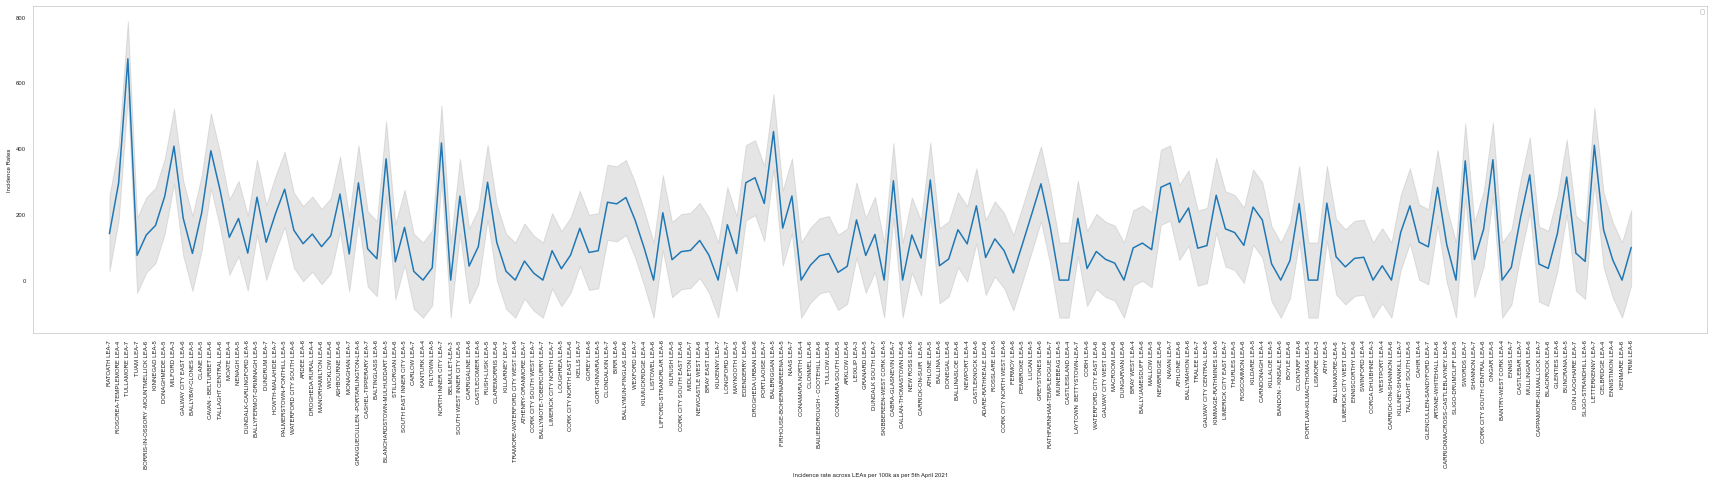

In [66]:
plt.figure(figsize=(30,6))
plt.plot(df1.ENGLISH, df1.P14_100k)
e = df1['P14_100k'].std()
plt.fill_between(df1.ENGLISH, df1.P14_100k - e, df1.P14_100k + e,color='gray', alpha=0.2)
plt.xticks(df1.ENGLISH, rotation=90)
plt.xlabel('Incidence rate across LEAs per 100k as per 5th April 2021')
plt.ylabel('Incidence Rates')
plt.legend()
plt.grid(False)

## Box Plots

Text(0, 0.5, 'Incidence Rates')

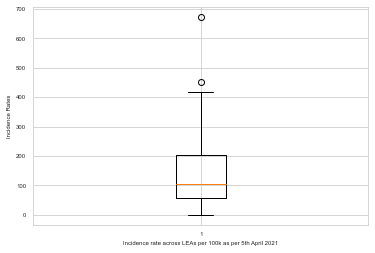

In [67]:

plt.figure(figsize=(6,4))
plt.boxplot(df1['P14_100k'])
plt.xlabel('Incidence rate across LEAs per 100k as per 5th April 2021')
plt.ylabel('Incidence Rates')

In [113]:
#create an empty dataframe

result = pd.DataFrame()
# get data for 5th April
result1 = df1[['ENGLISH','P14_100k']]

#get data for 12th April
result2 = df2[['ENGLISH','P14_100k']]

#get data for 19th April
result3 = df2[['ENGLISH','P14_100k']]

#merge dataframes
result = pd.merge(result1, result2, how="inner", on=["ENGLISH"])
result = pd.merge(result, result3, how="inner", on=["ENGLISH"])
result

,ENGLISH,P14_100k_x,P14_100k_y,P14_100k
0,RATOATH LEA-7,141.1,165.1,165.1
1,ROSCREA-TEMPLEMORE LEA-4,295.3,156.7,156.7
2,TULLAMORE LEA-7,672.2,408.1,408.1
3,TUAM LEA-7,75.3,132.6,132.6
4,BORRIS-IN-OSSORY -MOUNTMELLICK LEA-6,137.1,177.4,177.4
...,...,...,...,...
161,LETTERKENNY LEA-7,409.5,214.8,214.8
162,CELBRIDGE LEA-4,152.6,143.3,143.3
163,ENNISTIMON LEA-4,60.9,0.0,0.0
164,KENMARE LEA-6,0.0,0.0,0.0


## Comparative Box Plot

([<matplotlib.axis.XTick at 0x213fba049e8>,
 [Text(1, 0, '5th April'), Text(2, 0, '12th April'), Text(3, 0, '19th April')])

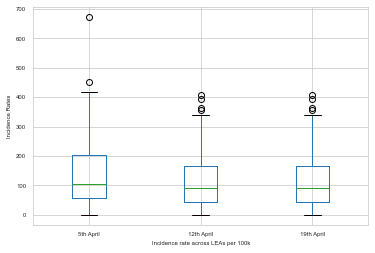

In [115]:
plt.figure(figsize=(6,4))
result.boxplot()
plt.xlabel('Incidence rate across LEAs per 100k')
plt.ylabel('Incidence Rates')
plt.xticks([1,2,3],['5th April','12th April','19th April'])

## Notch Box Plot

([<matplotlib.axis.XTick at 0x213fba95668>,
 [Text(1, 0, '5th April'), Text(2, 0, '12th April'), Text(3, 0, '19th April')])

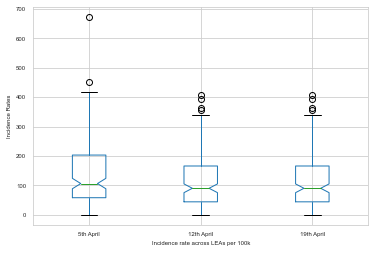

In [116]:
plt.figure(figsize=(6,4))
result.boxplot(notch=True)
plt.xlabel('Incidence rate across LEAs per 100k')
plt.ylabel('Incidence Rates')
plt.xticks([1,2,3],['5th April','12th April','19th April'])

## Box Plots with distribution of data points

Text(0, 0.5, 'Incidence Rates')

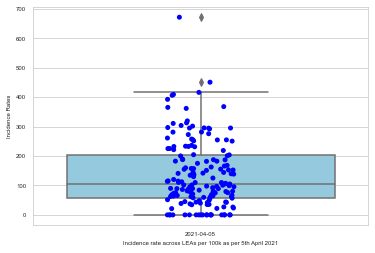

In [117]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
ax= sns.boxplot(x='date',y='P14_100k',data=df1, color='skyblue')
ax = sns.stripplot(x="date", y="P14_100k",data=df1, color='blue')
plt.xlabel('Incidence rate across LEAs per 100k as per 5th April 2021')
plt.ylabel('Incidence Rates')

## Violin Plots with distribution of data points

Text(0, 0.5, 'Incidence Rates')

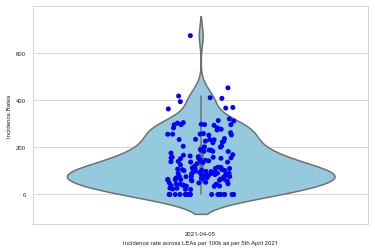

In [118]:
plt.figure(figsize=(6,4))
ax= sns.violinplot(x='date',y='P14_100k',data=df1, color='skyblue')
ax = sns.stripplot(x="date", y="P14_100k",data=df1, color='blue')
plt.xlabel('Incidence rate across LEAs per 100k as per 5th April 2021')
plt.ylabel('Incidence Rates')